# Importações:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, feature, filters, exposure
from scipy.ndimage import convolve
#from scipy import ndimage
from skimage import exposure
from scipy.misc import imread
from skimage.transform import rescale
import skimage.filters as skif
from skimage.filters import gaussian
from skimage.transform import match_histograms


from skimage import transform as tf



from skimage.transform import rescale, rotate, AffineTransform

%matplotlib inline

In [2]:
def exibe(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    #ax.set_axis_off()
    plt.show()
    
def histograma(img):
    color = [ 'r','g','b']
    for i, c in enumerate(color) :
        plt.hist(img[:,:,i].flatten(),256, color=c)
    plt.show()
    
def extrai_background(image):
    for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                #if image[i, j, 0] < 100 and image[i, j, 1] > 100 and image[i, j, 2] < 90:
                if image[i, j, 0] < 100 and image[i, j, 1] > 200 and image[i, j, 2] < 100:
                    image[i, j, 3] = 0 # setando transparencia maxima
                    
def extrai_background_matched(image, matched):
    for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if image[i, j, 3] == 0:
                     matched[i,j,3] = 0 # setando transparencia maxima onde era transparente

def add_mean_filter(image):
    mean_kernel = 1/9 *np.ones((3,3))
    for i in range(3):
        image[:, :, i] = convolve(image[:, :, i], mean_kernel, mode='mirror')

def junta_imagens(image, fundo):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i][j][3] != 0):
                fundo[i][j][0:4] = image[i][j][0:4]
            
#     show(image)
#     show(fundo)
    
def junta_imagens_pos(image, fundo, pos_i, pos_j):
    aux_j = pos_j
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j, 3] != 0:
                fundo[pos_i,pos_j,0:4] = image[i, j, 0:4]
            pos_j += 1
        pos_i += 1
        pos_j = aux_j
    return fundo

def junta_imagens_ref(reference, image, fundo, pos_i, pos_j):
    tam = image.shape
    ref_i = 300
    ref_j = 1300
    fundo = junta_imagens_pos(image, fundo, pos_i, pos_j)
#     exibe(fundo)
    matched = match_histograms(fundo[pos_i:pos_i+tam[0],pos_j:pos_j+tam[1]], reference[ref_i:ref_i+tam[0],ref_j:ref_j+tam[1]], multichannel=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),sharex=True, sharey=True)
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(fundo[pos_i:pos_i+tam[0],pos_j:pos_j+tam[1]])
    ax1.set_title('Source')
    ax2.imshow(reference[ref_i:ref_i+tam[0],ref_j:ref_j+tam[1]])
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()
    
    extrai_background_matched(image, matched)
    junta_imagens_pos(matched, fundo, pos_i, pos_j)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning

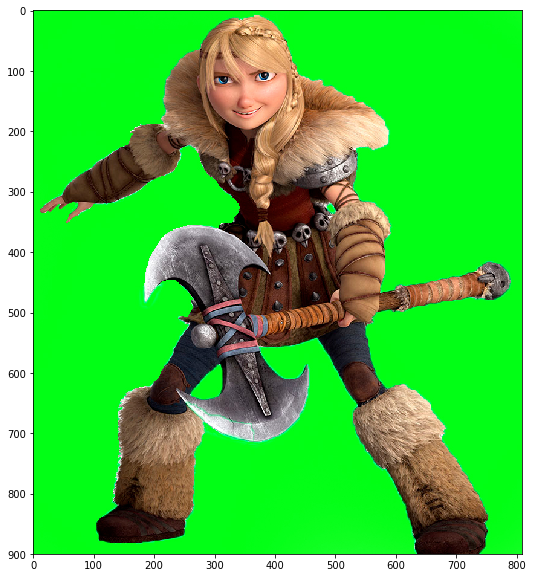

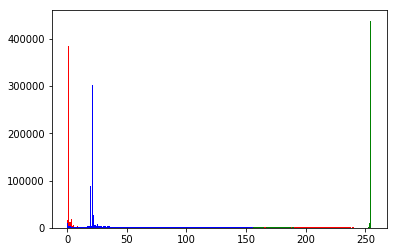

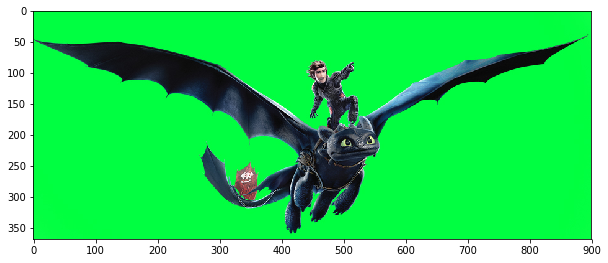

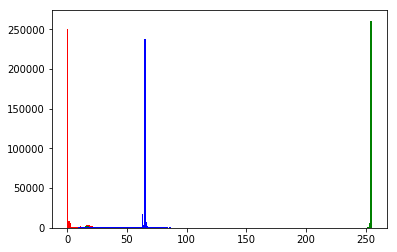

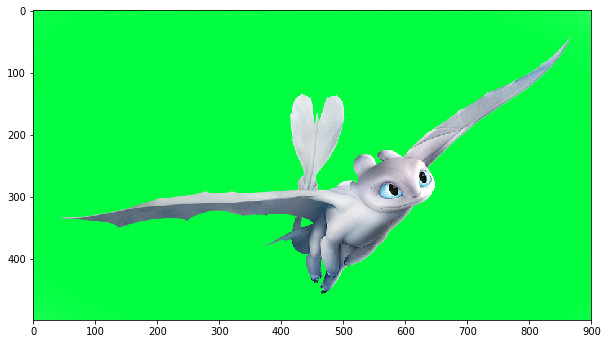

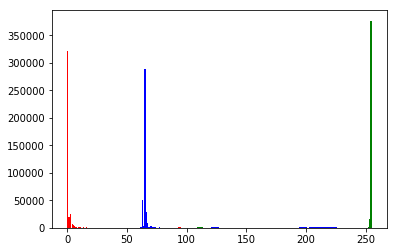

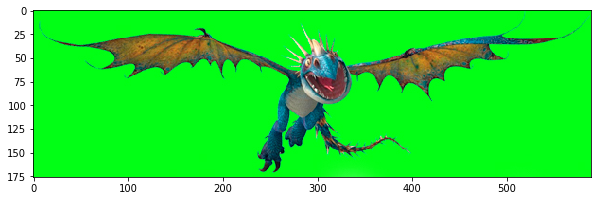

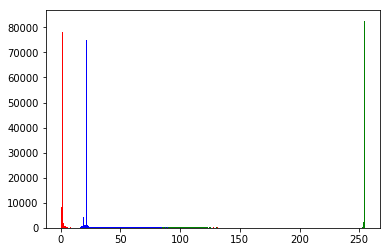

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [3]:
IMAGEM_1 = imread('./imagens/astrid2.jpg', mode='RGBA')
IMAGEM_2 = imread('./imagens/dragao_soluco1.jpg', mode='RGBA')
IMAGEM_3 = imread('./imagens/furiaDaLuz1.jpg', mode='RGBA')
IMAGEM_4 = imread('./imagens/dragaoAzul3.jpg', mode='RGBA')

exibe(IMAGEM_1)
histograma(IMAGEM_1)

exibe(IMAGEM_2)
histograma(IMAGEM_2)

exibe(IMAGEM_3)
histograma(IMAGEM_3)

exibe(IMAGEM_4)
histograma(IMAGEM_4)

referencia = imread('./imagens/fundo2.jpg', mode='RGBA')

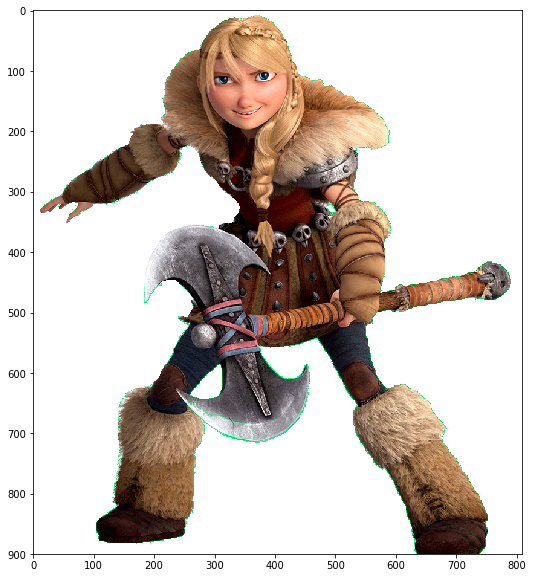

[  0 255  63 255]


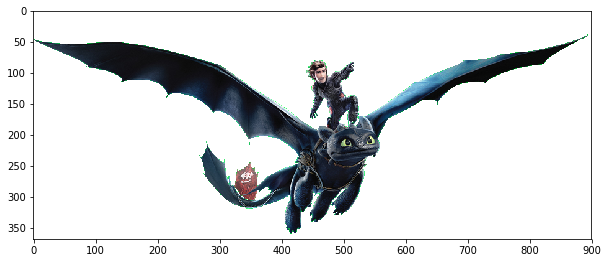

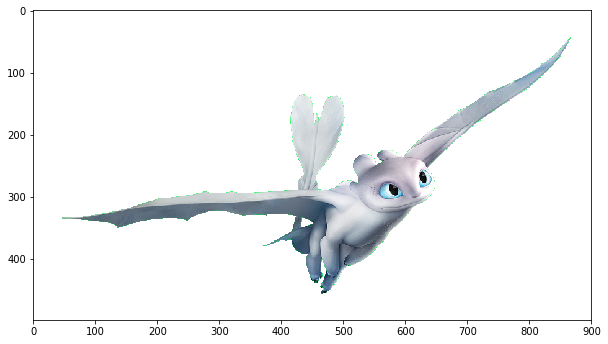

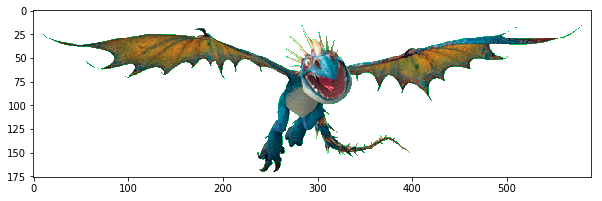

In [4]:
extrai_background(IMAGEM_1)
exibe(IMAGEM_1)

print(IMAGEM_2[0, 0, 0:4])
extrai_background(IMAGEM_2)
exibe(IMAGEM_2)

extrai_background(IMAGEM_3)
exibe(IMAGEM_3)

extrai_background(IMAGEM_4)
exibe(IMAGEM_4)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


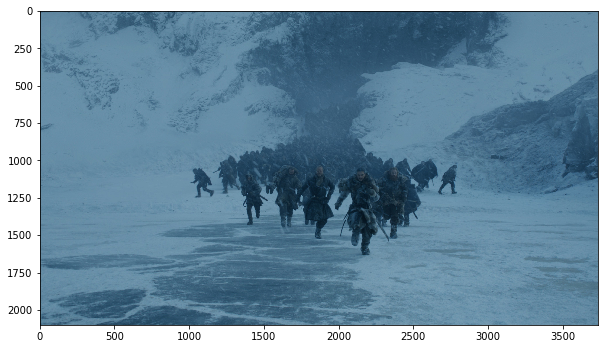

In [5]:
FUNDO = imread('./imagens/fundo2.jpg', mode='RGBA')
exibe(FUNDO)

In [6]:
# PRONTO
IMAGEM_1_r = 255 * rescale(IMAGEM_1, 0.7)

# PRONTO
tform = tf.AffineTransform(translation = (-10, 200), rotation=-0.5)
IMAGEM_3_c = tf.warp(IMAGEM_3,tform)
IMAGEM_3_c = 255 * IMAGEM_3_c

# IMAGEM_2_c = np.fliplr(IMAGEM_2)
# tform = tf.AffineTransform(translation = (240, -200), rotation=0.9)
# IMAGEM_2_c = tf.warp(IMAGEM_2_c,tform)
# IMAGEM_2_c = 255 * rescale(IMAGEM_2_c, 1.5)
IMAGEM_2_c = 255 * rotate(IMAGEM_2, 30, resize=0)

kernel = np.ones((3,3))/9
for i in range (3):
    IMAGEM_2_c[:, :, i] = convolve(IMAGEM_2_c[:, :, i], kernel, mode='mirror')

#exibe(IMAGEM_2_c)
IMAGEM_4_c = np.fliplr(IMAGEM_4)
IMAGEM_4_c = 255 * rescale(IMAGEM_4_c, 2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


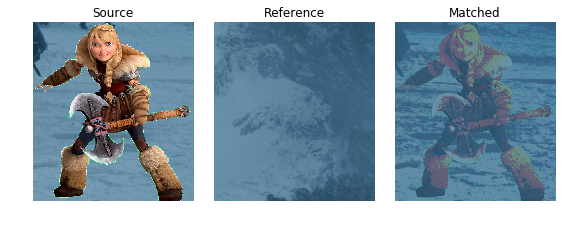

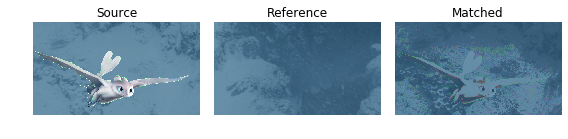

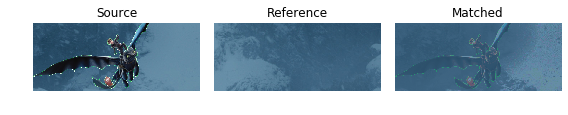

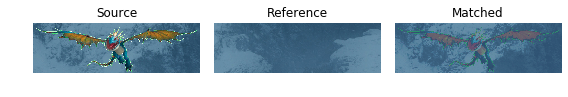

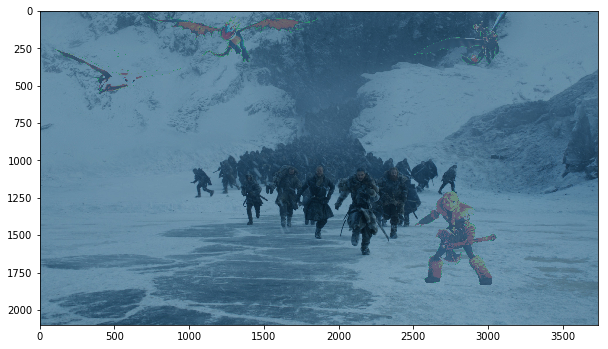

In [7]:
# PRONTO
junta_imagens_ref(referencia, IMAGEM_1_r, FUNDO, 1200, 2500)
junta_imagens_ref(referencia, IMAGEM_3_c, FUNDO, 100, 100)
junta_imagens_ref(referencia, IMAGEM_2_c, FUNDO, 0, 2500)
junta_imagens_ref(referencia, IMAGEM_4_c, FUNDO, 0, 700)

exibe(FUNDO)